In [182]:
from random import seed
from random import random
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed(1)
rand_10 = []
for _ in range(10):
	rand_10.append(max(random()*3, 1))
print(f"mean outcome of each team member: {rand_10}")
print(f"team outcome: {sum(rand_10)}")

mean outcome of each team member: [1, 2.542301210811698, 2.291323856929842, 1, 1.486305261275823, 1.3484731943662145, 1.9547789181682889, 2.3661700534065395, 1, 1]
team outcome: 15.989352494958407


In [183]:
def create_run(rand_10, group_outcome_only=False, run_type="standard"):
    if run_type=="random":
        outcome_of_members = get_outcome_random_growth(rand_10)
    elif run_type=="low":
        outcome_of_members = get_outcome_low_performer_growth(rand_10)
    elif run_type=="top":
        outcome_of_members = get_outcome_top_performer_growth(rand_10)
    else:
        outcome_of_members = get_outcome_no_growth(rand_10)
    run = pd.DataFrame(
            outcome_of_members,
            columns=[f"epoch{i}" for i in range(10)],
            index=[f"team_member{i}" for i in range(10)]
    )
    group_outcome = run.sum()
    if group_outcome_only:
        return group_outcome
    run.loc["group_outcome", :] = group_outcome
    run["total_outcome"] = run.sum(axis=1)
    return run

def get_outcome_no_growth(rand_10):
    outcome_of_members = []
    for i in rand_10:
        outcome_of_member = []
        for epoch in range(10):
            outcome_of_member.append(np.random.normal(i, sqrt(i)))
        outcome_of_members.append(outcome_of_member)
    return outcome_of_members

def get_outcome_random_growth(rand_10):
    outcome_of_members = []
    for i in rand_10:
        outcome_of_member = []
        for epoch in range(10):
            if random() <= 0.2:
                i = 1.2*i
            outcome_of_member.append(np.random.normal(i, sqrt(i)))
        outcome_of_members.append(outcome_of_member)
    return outcome_of_members

def get_outcome_low_performer_growth(rand_10):
    threshold = sorted(set(rand_10))[1]
    outcome_of_members = []
    n = 0
    for i in rand_10:
        outcome_of_member = []
        if i<=threshold:
            has_growth=True
            n+=1
        else:
            has_growth=False
        if n>2: # because baseline is cut off at 1, might have more than 2 team members with baseline 1 
            has_growth=False
        for epoch in range(10):
            if has_growth==True:
                i = 1.2*i
            outcome_of_member.append(np.random.normal(i, sqrt(i)))
        outcome_of_members.append(outcome_of_member)
    return outcome_of_members

def get_outcome_top_performer_growth(rand_10):
    threshold = sorted(set(rand_10))[-2]
    outcome_of_members = []
    for i in rand_10:
        outcome_of_member = []
        if i>=threshold:
            has_growth=True
        else:
            has_growth=False
        for epoch in range(10):
            if has_growth==True:
                i = 1.2*i
            outcome_of_member.append(np.random.normal(i, sqrt(i)))
        outcome_of_members.append(outcome_of_member)
    return outcome_of_members

def create_runs(no_runs=11, run_type="standard"):
    runs = pd.DataFrame(
        [create_run(rand_10, group_outcome_only=True, run_type=run_type) for epoch in range(no_runs)],
        index=[f"run{i}" for i in range(no_runs)]
    )
    runs["total_outcome"] = runs.sum(axis=1)
    return runs

# Scenario 1: no productivity gains 
- 10 team members with a mean outcome between 0-1, 10 years, outcome is normally distributed around the mean outcome and standard deviation sqrt(mean_outcome)
- 500 hypothetical runs

In [184]:
run = create_run(rand_10)
run

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,total_outcome
team_member0,2.459150,0.374507,-0.026258,0.744785,3.142552,1.339178,1.628544,-0.390010,-0.869382,1.429242,9.832309
team_member1,3.758246,3.567351,2.036839,3.455557,3.164962,-0.052480,5.751448,1.053234,4.207863,2.110420,29.053441
team_member2,1.736883,3.744402,4.768954,4.421119,1.069243,2.366309,2.195011,1.314766,2.167639,1.635636,25.419962
team_member3,2.335703,-1.194875,1.442485,0.488825,0.172454,0.001066,1.364425,0.919849,1.378397,1.098993,8.007321
team_member4,2.612646,1.961437,3.652967,0.281689,2.583404,1.572664,0.847667,1.147637,1.704777,1.135214,17.500102
team_member5,0.683399,3.730008,3.582871,1.336406,1.469011,2.224416,1.927034,1.499441,0.545701,1.773270,18.771558
team_member6,1.900788,1.473204,3.094878,2.614106,0.935470,3.893919,0.228337,0.170064,2.108079,2.282542,18.701387
team_member7,4.357106,-0.196407,2.574879,1.909551,4.498949,3.046603,-0.067632,1.886428,-0.213125,6.282413,24.078764
team_member8,0.617506,1.086786,-0.937503,-0.229519,0.700841,-0.110289,0.219520,2.013131,2.154250,-0.680436,4.834287
team_member9,0.103940,0.101900,1.151385,-0.967077,-1.196767,1.462221,3.328180,1.148952,1.031342,0.860324,7.024400


10 year outcome of team member: 25.41996176188117


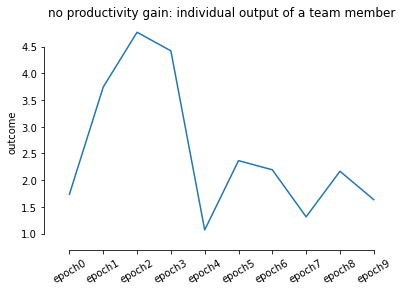

In [185]:
team_member = run.iloc[2, :10]
ax = sns.lineplot(data=team_member.T, dashes=False) \
    .tick_params(axis='x', rotation=30)

plt.ylabel("outcome")
plt.title('no productivity gain: individual output of a team member')
sns.despine(offset=10, trim=True)

print(f"10 year outcome of team member: {sum(team_member)}")

10 year outcome of group: 163.22353145814483


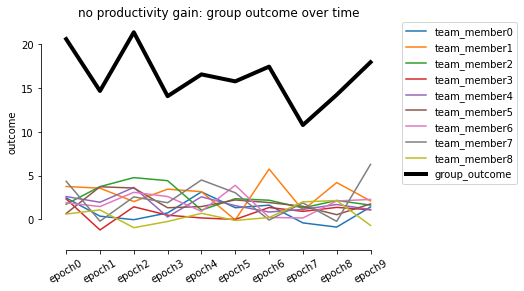

In [186]:
ax = sns.lineplot(data=run.iloc[:9, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

group_outcome = run.iloc[10, :10]
sns.lineplot(data=group_outcome.T, linewidth = 4, color='black', label=run.index[10])

plt.ylabel("outcome")
plt.title('no productivity gain: group outcome over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

print(f"10 year outcome of group: {sum(group_outcome)}")

In [187]:
runs=create_runs(no_runs=501)
runs

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,total_outcome
run0,12.675580,16.840806,17.172343,19.468835,14.903180,14.506817,15.970440,8.228159,12.376624,21.782090,153.924872
run1,12.298397,16.455140,16.545553,19.293991,18.375531,13.407718,20.681025,18.379223,16.781213,15.879558,168.097349
run2,18.035801,24.231153,16.469418,23.619416,10.880859,13.771306,16.845024,14.433447,12.899629,17.167089,168.353142
run3,19.771385,16.431277,20.675314,16.076034,13.152346,20.753920,21.583718,21.057991,12.754980,17.276095,179.533059
run4,16.154700,19.323163,11.734788,17.355641,14.058240,22.275254,10.940588,22.290891,13.541754,13.783737,161.458757
...,...,...,...,...,...,...,...,...,...,...,...
run496,20.929214,18.789161,11.724609,15.645098,14.400725,19.552534,17.560185,12.384138,15.393393,14.661337,161.040394
run497,14.471236,16.004726,16.173019,9.584258,17.411740,21.524780,19.856386,18.143443,15.978879,28.520932,177.669400
run498,17.597197,13.126711,10.215711,14.860612,14.495845,17.353798,12.171287,21.922833,14.565149,15.501492,151.810635
run499,21.022203,17.337557,14.207976,17.999604,18.173859,15.329470,14.534186,15.796071,16.984847,17.201422,168.587195


10 year outcome in median run: 318.6536507403898


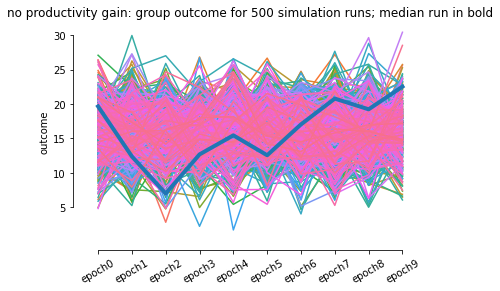

In [188]:
ax = sns.lineplot(data=runs.iloc[:, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

median_run = runs.loc[runs["total_outcome"]==runs["total_outcome"].median(), :]
sns.lineplot(data=median_run.iloc[:, :10].T, linewidth = 4, color='black', label="median run")
print(f"10 year outcome in median run: {sum(median_run.values[0])}")

plt.ylabel("outcome")
plt.title('no productivity gain: group outcome for 500 simulation runs; median run in bold')
plt.legend().remove() # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

# Scenario 2: 20% chance to increase baseline productivity by 20% each year 
- 10 team members with a mean outcome between 0-1, 10 years, outcome is normally distributed around the mean outcome and standard deviation sqrt(mean_outcome)
- performers have 20% chance to create 20% more outcome each year
- 500 hypothetical runs

10 year outcome of team member: 27.697249542969228


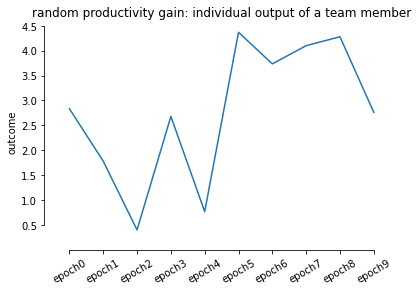

In [189]:
run = create_run(rand_10, run_type="random")

team_member = run.iloc[2, :10]
ax = sns.lineplot(data=team_member.T, dashes=False) \
    .tick_params(axis='x', rotation=30)

plt.ylabel("outcome")
plt.title('random productivity gain: individual output of a team member')
sns.despine(offset=10, trim=True)

print(f"10 year outcome of team member: {sum(team_member)}")

10 year outcome of group: 200.15806690315392


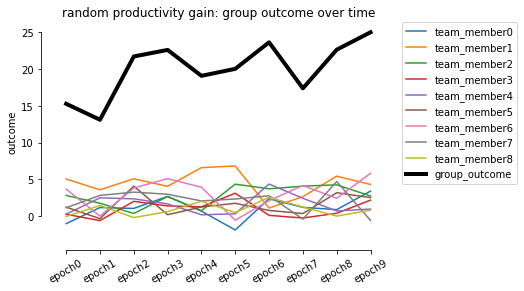

In [190]:
ax = sns.lineplot(data=run.iloc[:9, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

group_outcome = run.iloc[10, :10]
sns.lineplot(data=group_outcome.T, linewidth = 4, color='black', label=run.index[10])

plt.ylabel("outcome")
plt.title('random productivity gain: group outcome over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

print(f"10 year outcome of group: {sum(group_outcome)}")

In [191]:
runs=create_runs(no_runs=501, run_type="random")
runs

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,total_outcome
run0,12.344114,22.232037,21.289696,22.885555,27.259480,31.942518,16.688038,29.943951,26.246216,28.454154,239.285760
run1,14.546050,17.016368,21.664619,24.849161,19.451826,17.778610,20.990266,20.707420,20.986028,26.396861,204.387210
run2,14.377016,18.352634,22.057286,14.730816,17.639857,20.092506,25.849719,14.110624,23.642576,20.887268,191.740303
run3,21.330235,19.118060,18.132135,11.209285,22.798402,28.863429,22.376908,23.261083,17.578047,22.093340,206.760925
run4,15.635794,13.189711,12.714471,14.866076,18.044569,21.941448,21.038226,23.982961,25.038577,21.125286,187.577120
...,...,...,...,...,...,...,...,...,...,...,...
run496,4.131480,14.334608,20.345185,17.260599,19.011052,22.156814,13.495752,29.400208,19.601246,21.963294,181.700238
run497,19.153981,25.346623,27.654314,19.343786,20.311568,13.600800,17.223626,30.421110,23.414109,10.591705,207.061621
run498,16.412231,24.827657,23.905828,13.874409,14.945325,20.654137,16.659709,22.657278,10.923588,27.411901,192.272061
run499,20.519891,17.481262,12.702237,17.073211,18.662486,20.028197,16.032509,22.340354,25.049741,23.030829,192.920717


10 year outcome in median run: 397.8798036832463


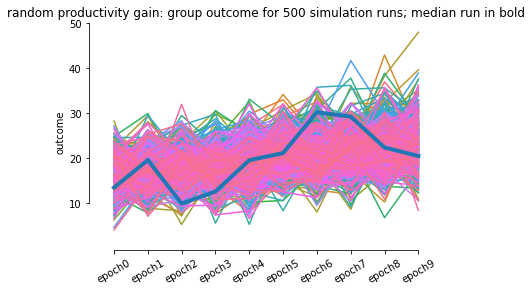

In [192]:
ax = sns.lineplot(data=runs.iloc[:, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

median_run = runs.loc[runs["total_outcome"]==runs["total_outcome"].median(), :]
sns.lineplot(data=median_run.iloc[:, :10].T, linewidth = 4, color='black', label="median run")
print(f"10 year outcome in median run: {sum(median_run.values[0])}")

plt.ylabel("outcome")
plt.title('random productivity gain: group outcome for 500 simulation runs; median run in bold')
plt.legend().remove() # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

# Scenario 3: 2 lowest performers increase baseline productivity by 20% each year 
- 10 team members with a mean outcome between 0-1, 10 years, outcome is normally distributed around the mean outcome and standard deviation sqrt(mean_outcome)
- 2 lowest performers create 20% more outcome each year
- 500 hypothetical runs

10 year outcome of team member: 29.51769758285592


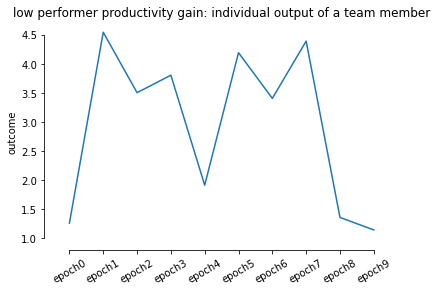

In [193]:
run = create_run(rand_10, run_type="low")

team_member = run.iloc[2, :10]
ax = sns.lineplot(data=team_member.T, dashes=False) \
    .tick_params(axis='x', rotation=30)

plt.ylabel("outcome")
plt.title('low performer productivity gain: individual output of a team member')
sns.despine(offset=10, trim=True)

print(f"10 year outcome of team member: {sum(team_member)}")

10 year outcome of group: 201.57466126165917


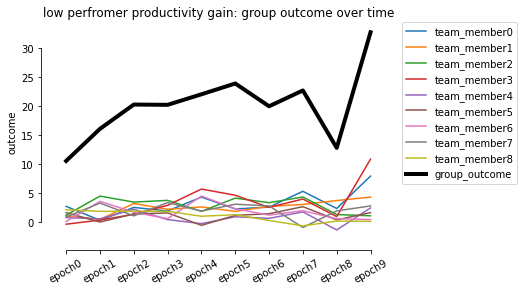

In [194]:
ax = sns.lineplot(data=run.iloc[:9, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

group_outcome = run.iloc[10, :10]
sns.lineplot(data=group_outcome.T, linewidth = 4, color='black', label=run.index[10])

plt.ylabel("outcome")
plt.title('low perfromer productivity gain: group outcome over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

print(f"10 year outcome of group: {sum(group_outcome)}")

In [195]:
runs=create_runs(no_runs=501, run_type="low")
runs

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,total_outcome
run0,13.630543,10.256417,17.433015,19.880588,23.904059,28.342934,19.222112,22.126247,23.989759,25.263334,204.049009
run1,14.677899,14.924268,14.890294,19.845365,18.803694,21.829369,20.896181,16.278187,33.537044,32.190481,207.872782
run2,19.579000,17.472487,16.084514,17.169359,16.090661,24.192538,14.265278,35.307209,21.023216,29.948734,211.132998
run3,18.419491,17.035523,18.589121,12.326715,14.125469,18.020946,17.316426,17.884684,29.543981,29.053488,192.315845
run4,14.937450,8.882985,18.362726,14.037781,16.639918,19.092372,25.549266,20.022229,27.054696,28.785980,193.365403
...,...,...,...,...,...,...,...,...,...,...,...
run496,23.064242,16.992741,18.332864,17.780126,15.879591,21.201429,28.330457,23.769658,24.187428,24.996724,214.535260
run497,11.252804,10.379420,25.574171,17.810273,21.864949,18.644841,18.659380,28.304904,12.457341,31.363696,196.311781
run498,19.273612,17.297366,14.425296,23.617205,17.133749,24.222526,37.015079,20.395375,20.365088,37.134446,230.879744
run499,10.946942,19.645435,20.468766,19.220966,25.452134,17.139066,23.796933,27.768881,26.260859,27.608037,218.308020


10 year outcome in median run: 405.2027774888839


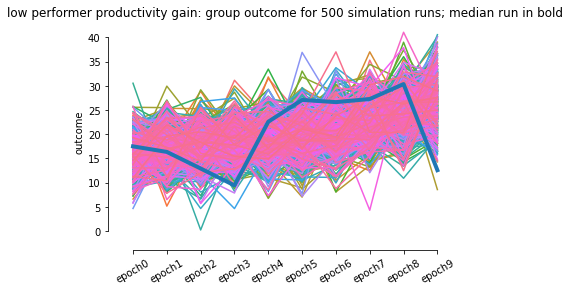

In [196]:
ax = sns.lineplot(data=runs.iloc[:, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

median_run = runs.loc[runs["total_outcome"]==runs["total_outcome"].median(), :]
sns.lineplot(data=median_run.iloc[:, :10].T, linewidth = 4, color='black', label="median run")
print(f"10 year outcome in median run: {sum(median_run.values[0])}")

plt.ylabel("outcome")
plt.title('low performer productivity gain: group outcome for 500 simulation runs; median run in bold')
plt.legend().remove() # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

# Scenario 4: 2 top performers increase baseline productivity by 20% each year 
- 10 team members with a mean outcome between 0-1, 10 years, outcome is normally distributed around the mean outcome and standard deviation sqrt(mean_outcome)
- 2 top performers create 20% more outcome each year
- 500 hypothetical runs

10 year outcome of team member: 28.823514096237783


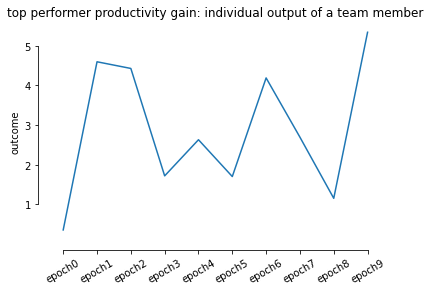

In [197]:
run = create_run(rand_10, run_type="top")

team_member = run.iloc[2, :10]
ax = sns.lineplot(data=team_member.T, dashes=False) \
    .tick_params(axis='x', rotation=30)

plt.ylabel("outcome")
plt.title('top performer productivity gain: individual output of a team member')
sns.despine(offset=10, trim=True)

print(f"10 year outcome of team member: {sum(team_member)}")

10 year outcome of group: 276.95412849404363


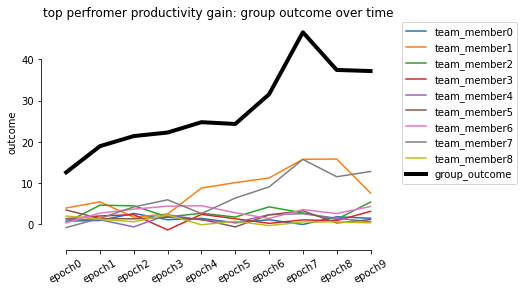

In [198]:
ax = sns.lineplot(data=run.iloc[:9, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

group_outcome = run.iloc[10, :10]
sns.lineplot(data=group_outcome.T, linewidth = 4, color='black', label=run.index[10])

plt.ylabel("outcome")
plt.title('top perfromer productivity gain: group outcome over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)

print(f"10 year outcome of group: {sum(group_outcome)}")

In [199]:
runs=create_runs(no_runs=501, run_type="top")
runs

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,total_outcome
run0,13.925446,21.669372,12.712187,25.948574,18.171254,26.275335,18.360089,34.471424,52.167560,37.513871,261.215112
run1,15.777683,14.433839,14.259394,28.315367,14.736053,25.891568,17.098829,49.454460,46.608298,36.680954,263.256445
run2,17.479029,24.189185,20.671034,22.854912,26.659837,24.833736,25.402255,14.500311,45.533259,40.238351,262.361910
run3,23.420573,22.360954,24.947762,15.514610,17.057205,26.734773,26.055906,29.899195,34.525119,37.022814,257.538910
run4,19.821213,13.292175,19.560011,24.203093,19.560359,18.485892,30.294950,30.896467,34.782133,40.234207,251.130500
...,...,...,...,...,...,...,...,...,...,...,...
run496,22.438959,17.211076,25.581391,17.252453,21.438882,12.811609,25.539178,39.266224,27.918417,28.827310,238.285499
run497,20.569477,26.837825,13.108834,19.180813,18.119912,32.177922,39.992874,35.017582,36.528398,61.596922,303.130560
run498,9.883865,16.105568,14.532592,22.222470,22.303536,31.993244,28.239183,36.922834,34.554235,43.520050,260.277578
run499,13.942946,23.337631,17.171703,25.289849,20.128535,31.813396,35.228837,36.402413,40.169901,47.187155,290.672366


10 year outcome in median run: 526.1660456718528


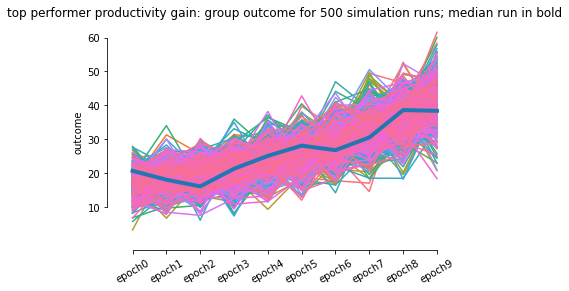

In [200]:
ax = sns.lineplot(data=runs.iloc[:, :10].T, dashes=False) \
    .tick_params(axis='x', rotation=30)

median_run = runs.loc[runs["total_outcome"]==runs["total_outcome"].median(), :]
sns.lineplot(data=median_run.iloc[:, :10].T, linewidth = 4, color='black', label="median run")
print(f"10 year outcome in median run: {sum(median_run.values[0])}")

plt.ylabel("outcome")
plt.title('top performer productivity gain: group outcome for 500 simulation runs; median run in bold')
plt.legend().remove() # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(offset=10, trim=True)